In [1]:
#Load Packages
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# Import train_test_split function
from sklearn.model_selection import train_test_split
#Importing confusion matrix
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score,classification_report
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("same_publishing_timing.csv")

# Random Forest
### First MODEL with trending days up to 46 days


#### Train test split

In [3]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count,Number_of_days_it_trended
count,21829.000000,2.182900e+04,2.182900e+04,21829.000000,2.182900e+04,21829.000000
mean,18.908379,2.886185e+06,1.451690e+05,2562.932613,1.151151e+04,5.522104
std,6.704518,7.075980e+06,4.066388e+05,12086.523677,8.903667e+04,2.005725
min,1.000000,4.347200e+04,0.000000e+00,0.000000,0.000000e+00,1.000000
25%,17.000000,5.944330e+05,2.095800e+04,150.000000,1.477000e+03,4.000000
50%,20.000000,1.214740e+06,5.172000e+04,606.000000,3.365000e+03,5.000000
75%,24.000000,2.663146e+06,1.313570e+05,1762.000000,7.942000e+03,6.000000
max,29.000000,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06,36.000000


Accuracy of Random Forest Classifier:  23.0 % (rounded to 1 decimal place)
              precision    recall  f1-score   support

           1       0.02      0.01      0.01       108
           2       0.08      0.05      0.06       111
           3       0.07      0.05      0.06       358
           4       0.23      0.24      0.24       946
           5       0.29      0.36      0.32      1405
           6       0.25      0.29      0.27      1228
           7       0.18      0.16      0.17       674
           8       0.12      0.08      0.09       339
           9       0.06      0.02      0.03       135
          10       0.03      0.01      0.02        69
          11       0.00      0.00      0.00        27
          12       0.00      0.00      0.00        36
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         3
     

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall 

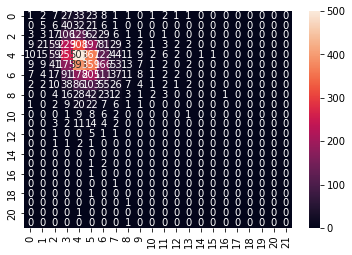

In [4]:
X=df[['view_count', 'categoryId', 'comment_count']]  # Features
y=df['Number_of_days_it_trended']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% training and 25% test
X_train.shape, X_test.shape

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Create our predictions
prediction = clf.predict(X_test)

# Display accuracy score
print("Accuracy of Random Forest Classifier: ",round(accuracy_score(y_test, prediction)*100,1), '\b% (rounded to 1 decimal place)')

sb.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt=".0f", annot_kws={"size": 10})
print(classification_report(y_test, prediction))

## Second Model up to 10 days

### change the number of days it trended to < 10 days

In [5]:
df2 = df[df['Number_of_days_it_trended'] < 10]

In [6]:
df2.describe()

,categoryId,view_count,likes,dislikes,comment_count,Number_of_days_it_trended
count,21145.000000,2.114500e+04,2.114500e+04,21145.000000,2.114500e+04,21145.000000
mean,18.915772,2.753741e+06,1.402570e+05,2434.441286,1.111772e+04,5.319839
std,6.700970,6.619777e+06,3.965915e+05,11842.892747,8.780448e+04,1.585081
min,1.000000,4.347200e+04,0.000000e+00,0.000000,0.000000e+00,1.000000
25%,17.000000,5.858520e+05,2.053300e+04,141.000000,1.447000e+03,4.000000
50%,20.000000,1.188536e+06,5.070900e+04,582.000000,3.286000e+03,5.000000
75%,24.000000,2.584255e+06,1.282540e+05,1704.000000,7.696000e+03,6.000000
max,29.000000,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06,9.000000


Accuracy of Random Forest Classifier:  24.5 % (rounded to 1 decimal place)
              precision    recall  f1-score   support

           1       0.06      0.03      0.04        90
           2       0.01      0.01      0.01       124
           3       0.10      0.07      0.08       361
           4       0.26      0.25      0.25       979
           5       0.29      0.38      0.33      1380
           6       0.26      0.29      0.27      1183
           7       0.21      0.19      0.20       694
           8       0.16      0.09      0.12       342
           9       0.05      0.02      0.03       134

    accuracy                           0.24      5287
   macro avg       0.15      0.15      0.15      5287
weighted avg       0.23      0.24      0.23      5287



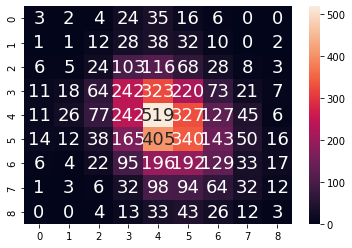

In [7]:
X=df2[['view_count', 'categoryId', 'comment_count']]  # Features
y=df2['Number_of_days_it_trended']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% training and 25% test

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Create our predictions
prediction = clf.predict(X_test)

# Display accuracy score
print("Accuracy of Random Forest Classifier: ",round(accuracy_score(y_test, prediction)*100,1), '\b% (rounded to 1 decimal place)')
sb.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt=".0f", annot_kws={"size": 18})
print(classification_report(y_test, prediction))

## Third Model up to 5 days

In [8]:
df3 = df[df['Number_of_days_it_trended'] < 5]


In [9]:
df3.describe()

,categoryId,view_count,likes,dislikes,comment_count,Number_of_days_it_trended
count,6066.000000,6.066000e+03,6.066000e+03,6066.000000,6.066000e+03,6066.000000
mean,19.211177,1.618367e+06,8.282504e+04,1294.960106,6.376052e+03,3.425321
std,6.118404,4.642180e+06,2.735773e+05,4779.098698,8.926226e+04,0.869438
min,1.000000,4.347200e+04,0.000000e+00,0.000000,0.000000e+00,1.000000
25%,17.000000,4.015620e+05,1.233550e+04,0.000000,8.805000e+02,3.000000
50%,20.000000,7.843430e+05,2.972750e+04,342.000000,2.032500e+03,4.000000
75%,24.000000,1.659094e+06,7.797000e+04,986.750000,4.464750e+03,4.000000
max,29.000000,2.644074e+08,1.602153e+07,150989.000000,6.738537e+06,4.000000


Accuracy of Random Forest Classifier:  80.8 % (rounded to 1 decimal place)
              precision    recall  f1-score   support

           1       0.14      0.08      0.10        78
           2       0.11      0.04      0.06       125
           3       0.24      0.14      0.17       377
           4       0.62      0.80      0.70       937

    accuracy                           0.54      1517
   macro avg       0.28      0.26      0.26      1517
weighted avg       0.46      0.54      0.49      1517



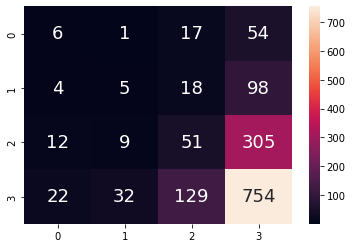

In [10]:
X=df3[['view_count', 'categoryId', 'comment_count']]  # Features
y=df3['Number_of_days_it_trended']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% training and 25% test

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Create our predictions
prediction = clf.predict(X_test)

# Display accuracy score
print("Accuracy of Random Forest Classifier: ",round(accuracy_score(y_test, prediction)*100,1), '\b% (rounded to 1 decimal place)')


sb.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt=".0f", annot_kws={"size": 18})
print(classification_report(y_test, prediction))

# Conclusion

###